In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns


In [3]:
# Reading Consumption Per capita in USD 

consumption = pd.read_csv('Per capita personal consumption expenditures.csv', skiprows=4,nrows=1 )
consumption = consumption.drop(['GeoFips','GeoName','1997'], axis=1)
consumption = consumption.T
consumption = consumption.reset_index()
consumption.columns = consumption.columns = ['years','consumption']

# Reading income Per capita in USD 

income = pd.read_csv('Per capita personal incom.csv', skiprows=4,nrows=1 )
income = income.drop(['GeoFips','GeoName'], axis=1)
income  = income.T
income = income.reset_index()
income.columns = ['years','Income']

# Merging consumption and income in one DataFrame 

data = pd.merge(consumption, income, how='left', on='years')

# Plotting : 
X = data['Income']
Y = data['consumption']

# sns.set()
# plt.plot(X,Y, marker ='o', linestyle = 'none')
# plt.xlabel('Income per Capita in USD')
# plt.ylabel('Consumption per Capita in USD')
# plt.show()

print(list(zip(X,Y)))

[(29400, 22925), (31042, 24373), (32858, 26015), (33258, 26399), (33518, 27055), (34545, 28271), (36577, 29900), (37592, 31495), (40265, 33051), (43125, 34578), (44550, 35221), (41851, 34362), (42533, 34935), (44571, 36184), (47737, 37392), (48237, 38314), (51505, 39709), (53776, 41190), (55519, 42554), (57896, 44377)]


In [4]:
z = list(zip(X,Y))

# Choosing stating value of m/ theta0 :
m = (z[0][1]/z[0][0])
print(m)



# Choosing starting value of b/ theta1 : 

## Methode 1 : 

b1 = (z[0][0]/z[0][1])
print(b1)

## Methode 2 : 
b =[]

for i in range(0, 20):
        x = z[i][0]
        y = z[i][1]
        c = x/y
        b.append(c)
        
print(np.mean(b))
    
    

0.7797619047619048
1.282442748091603
1.255087939156373


The starting values are: theta0 is 0.1, theta1 is 0.1, the error is 881017953.8404999


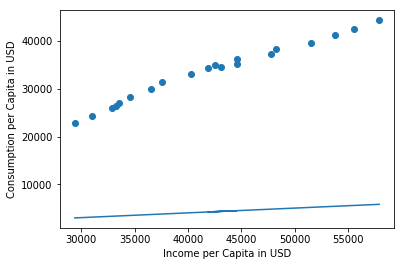

Converged! Completed 100 iterations


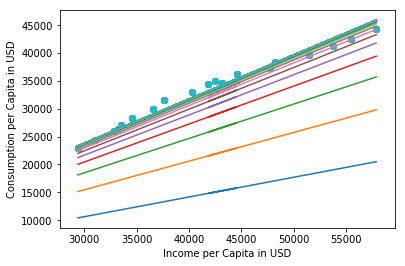

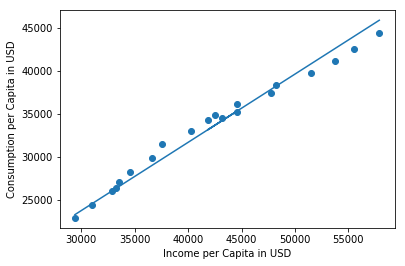

END: theta0=0.7927515826693969, theta1=0.1000179769248672, error=896851.639053878


In [13]:
def plot_line_on_graph(theta, points):
    # draws a line and plots scatter points on a graph given theta values and points
    x_plots = []
    y_plots = []
    for i in range(0, len(points)):
        x = points[i][0]
        y = theta[0] * x + theta[1]
        x_plots.append(x)
        y_plots.append(y)
    plt.scatter(X, Y)
    plt.xlabel('Income per Capita in USD')
    plt.ylabel('Consumption per Capita in USD')
    plt.plot(x_plots, y_plots)
    plt.show()
    

def computer_error_for_line_given_points(theta, points):
    # given theta values and points, returns the mean squared error of the hypothesis - actual y values
    totalError = 0
    for i in range(0, len(points)):
        x = points[i][0]
        y = points[i][1]
        # y = mx + b
        totalError += (y - (theta[0] * x + theta[1])) ** 2
    return totalError / float(len(points))

def gradient_descent(t0_current, t1_current, points, learning_rate):
    # calculates the partial derivative of theta 0 and 1 and returns updated theta values given a learning rate
    t0_gradient = 0
    t1_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i][0]
        y = points[i][1]
        t1_gradient += -(2/N) * (y - ((t0_current * x) + t1_current))
        t0_gradient += -(2/N) * x * (y - ((t0_current * x) + t1_current))
    new_t0 = t0_current - (learning_rate * t0_gradient)
    new_t1 = t1_current - (learning_rate * t1_gradient)

    return  [new_t0, new_t1]


def gradient_descent_runner(points, theta, learning_rate, num_iterations):
    # runs the gradient descent algorithm on a data set to find optimal theta values
    iterations_count = 0
    for i in range(num_iterations):
        iterations_count += 1
        theta_0_old = theta[0]
        theta_1_old = theta[1]
        
        # update theta values
        theta[0], theta[1] = gradient_descent(theta[0], theta[1], points, learning_rate)


#         plt.scatter(iterations_count, abs(theta[0] - theta_0_old) + abs(theta[1] - theta_1_old), c='r')
        
        
        # plotting all the lines:
        plt.scatter(X, Y)
        plt.xlabel('Income per Capita in USD')
        plt.ylabel('Consumption per Capita in USD')
        plt.plot(X, theta[0]*X + theta[1])
        

        # check to see if we have converged (rate of change is less than learning rate)
        if abs(theta[0] - theta_0_old) < learning_rate and abs(theta[1] - theta_1_old) < learning_rate:
            break
    print('Converged! Completed {0} iterations'.format(iterations_count))
    
    plt.show()
    return [theta[0], theta[1]]


def run():
    #import data from data frame
    points = list(zip(X,Y))

    #hyperparameters
    learning_rate = 0.0000000001
    num_iterations = 100

    #starting theta values : Random
    theta = np.array([0.1, 0.1])
    
    # Calculating the starting error with starting theta values, and plotting the graph : 
    starting_error = computer_error_for_line_given_points(theta, points)
    print('The starting values are: theta0 is {0}, theta1 is {1}, the error is {2}'.format(theta[0], theta[1], starting_error))
    plot_line_on_graph(theta, points)
   

    # run gradient descent to find and return optimal theta values and plotting all the lines:
    [theta[0], theta[1]] = gradient_descent_runner(points, theta, learning_rate, num_iterations)
    
    # Calculating the end error with optimal theta values, and plotting the graph : 
    end_error = computer_error_for_line_given_points(theta, points)
    plot_line_on_graph(theta, points)
    print('END: theta0={0}, theta1={1}, error={2}'.format(float(theta[0]), float(theta[1]), end_error))
   
 
    
run()



In [6]:
# Error values:
#  theta = np.array([0.1, 0.1]), end error=   896 851.6350650319
# theta = np.array([0.5, 0.5]), end error=    896 767.4372200768 
# theta = np.array([0.77, 0.77]),end error=   896 710.6077346442 (calculated m )
# theta = np.array([1.25,1.25]), end error=   896 609.586990292  (calculated mean of cof x/y)
# theta = np.array([1.26,1.26]),end  error=   896 607.4826574146 (calculated and rouned the mean of cof x/y)
# theta = np.array([0.77, 1.28]), end error=  896 603.27155518    (calculated values)
# theta = np.array([0.779, 1.282]),end error= 896 602.8507262353  (calculated values)

# theta = np.array([0.7927244915612401, 1.2824640886845702]), error= 896 602.7531314038 (exacte calclated values)
# theta0=0.7927244910791086, theta1=1.2824851322906,          error= 896602.7487030734  (end values of exacte..)